<a href="https://colab.research.google.com/github/juansokil/Deep_Learning/blob/master/FaceDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import keras
keras.__version__

Using TensorFlow backend.


'2.2.4'

In [0]:

from google.colab import drive
drive.mount('/content/gdrive')

import os
os.chdir("/content/gdrive/My Drive/deep_learning")
!ls

In [0]:
####ALGUNOS COMANDOS %%BASH PARA HACER COSAS UTILES#####

#%%bash 
#cd train/cristinafkirchner/
#mkdir imagenes
#cd imagenes
#cd train
#wget -nc https://s3.amazonaws.com/iadh-2018/dogs-vs-cats/train.zip
#unzip train.zip
#cd ..

In [0]:
###Generador de Imagenes###
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')


test_datagen = ImageDataGenerator(rescale=1./255)

In [0]:
###debo cargar una carpeta entera###
train_generator = train_datagen.flow_from_directory(
        '/mnt/c/Source/deep_learning/partidos_politicos/train/',
        batch_size=1,
        target_size=(100, 100),
        color_mode = 'rgb')

validation_generator = test_datagen.flow_from_directory(
        '/mnt/c/Source/deep_learning/partidos_politicos/train/',
        batch_size=1,
        target_size=(100, 100),
        color_mode = 'rgb')

Found 3802 images belonging to 3 classes.
Found 3802 images belonging to 3 classes.


El primer analisis a realizar es la cantidad personas que aparecen dentro de las publicaciones

In [0]:
!pip3 install mtcnn
from mtcnn.mtcnn import MTCNN
import cv2

In [0]:
import glob
path = glob.glob("/mnt/c/Source/deep_learning/partidos_politicos/train/cristinafkirchner/*.jpg")
caras = []
for image in path:
    img = cv2.imread(image)
    detector = MTCNN()
    result = detector.detect_faces(img)
    #print('Para la imagen ', img,' el resultado es: ',result)
    array_length = len(result)
    array_length
    
    for i in range(array_length):
        bounding_box = result[i]['box']
        cv2.rectangle(img,
              (bounding_box[0], bounding_box[1]),
              (bounding_box[0]+bounding_box[2], bounding_box[1] + bounding_box[3]),(0,155,255),2)
    print('Para la imagen ',image,' La cantidad de caras detectadas es ',i)
    caras.append(i)    

    
caras_cristina=caras

In [0]:
import glob
path = glob.glob("/mnt/c/Source/deep_learning/partidos_politicos/train/mauriciomacri/*.jpg")
caras = []
for image in path:
    img = cv2.imread(image)
    detector = MTCNN()
    result = detector.detect_faces(img)
    #print('Para la imagen ', img,' el resultado es: ',result)
    array_length = len(result)
    array_length
    
    for i in range(array_length):
        bounding_box = result[i]['box']
        cv2.rectangle(img,
              (bounding_box[0], bounding_box[1]),
              (bounding_box[0]+bounding_box[2], bounding_box[1] + bounding_box[3]),(0,155,255),2)
    print('Para la imagen ',image,' La cantidad de caras detectadas es ',i)
    caras.append(i)    

    
caras_macri=caras

In [0]:
import glob
path = glob.glob("/mnt/c/Source/deep_learning/partidos_politicos/train/nico_del_cano/*.jpg")
caras = []
for image in path:
    img = cv2.imread(image)
    detector = MTCNN()
    result = detector.detect_faces(img)
    #print('Para la imagen ', img,' el resultado es: ',result)
    array_length = len(result)
    array_length
    
    for i in range(array_length):
        bounding_box = result[i]['box']
        cv2.rectangle(img,
              (bounding_box[0], bounding_box[1]),
              (bounding_box[0]+bounding_box[2], bounding_box[1] + bounding_box[3]),(0,155,255),2)
    print('Para la imagen ',image,' La cantidad de caras detectadas es ',i)
    caras.append(i)    

    
caras_nico=caras

In [0]:
print('Cristina', len(caras_cristina))
print('Macri', len(caras_macri))
print('Nico', len(caras_nico))

Cristina 1085
Macri 1547
Nico 1168


In [0]:

import matplotlib.pyplot as plt

myarray = caras_macri
results, edges = np.histogram(myarray, normed=True)

binWidth = edges[1] - edges[0]
plt.bar(edges[:-1], results*binWidth, binWidth, color = 'green', alpha=0.5)



plt.show

In [0]:
myarray = caras_cristina
results, edges = np.histogram(myarray, normed=True)

binWidth = edges[1] - edges[0]
plt.bar(edges[:-1], results*binWidth, binWidth, color = 'blue', alpha=0.5)


In [0]:

myarray = caras_nico
results, edges = np.histogram(myarray, normed=True)

binWidth = edges[1] - edges[0]
plt.bar(edges[:-1], results*binWidth, binWidth, color = 'red', alpha=0.5)


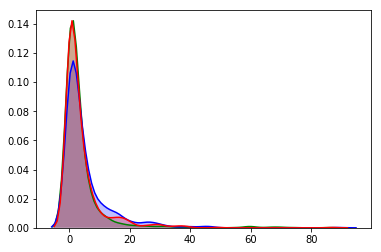

In [0]:
#!pip3 install seaborn

import seaborn as sns 
sns.kdeplot(caras_macri, shade=True, color="green", kernel='gau')
sns.kdeplot(caras_cristina, shade=True, color="blue", kernel='gau')
sns.kdeplot(caras_nico, shade=True, color="red", kernel='gau')


#sns.distplot(caras_macri, bins=120, kde=False, rug=True);
#sns.distplot(caras_cristina, bins=120, kde=False, rug=True);
#sns.distplot(caras_nico, bins=120, kde=False, rug=True);


In [0]:
# Python program to get average of a list 
def Average(lst): 
    return sum(lst) / len(lst) 
  
# Driver Code 

average = Average(caras_cristina) 
  
# Printing average of the list 
print("Average of the Cristina =", round(average, 2)) 



average = Average(caras_macri) 
  
# Printing average of the list 
print("Average of the Macri =", round(average, 2)) 


average = Average(caras_nico) 
  
# Printing average of the list 
print("Average of the Nico =", round(average, 2)) 

Average of the Cristina = 5.17
Average of the Macri = 3.68
Average of the Nico = 3.95


In [0]:
import numpy as np
from scipy import stats
macri= np.array(caras_macri)
stats.describe(macri)





Text(0.5, 1.0, 'Distribución de Personas por imagenes')

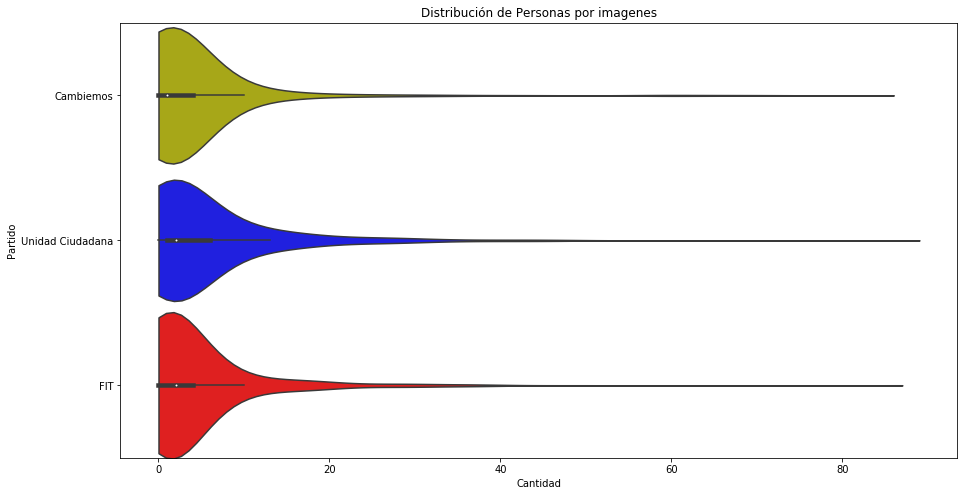

In [0]:
import pandas as pd


#Creating pandas dataframe from numpy array
dataset1 = pd.DataFrame({'Partido':'Cambiemos','Cantidad':macri})
dataset2 = pd.DataFrame({'Partido':'Unidad Ciudadana','Cantidad':cristina})
dataset3 = pd.DataFrame({'Partido':'FIT','Cantidad':nico})


df = dataset1.append([dataset2, dataset3])


plt.figure(figsize=(15,8))
sns.violinplot(df['Cantidad'], df['Partido'], alpha=0.8, palette=['y','b','r'], cut=0,  width=1.01, bw=0.5).set_title("Distribución de Personas por imagenes")


Text(0.5, 1.0, 'Cambiemos')

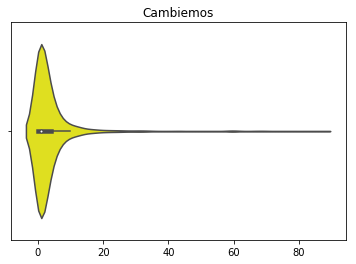

In [0]:
#plt.subplot(312)
#caras_macri=caras_macri.remove(123)

sns.violinplot(caras_macri, color="yellow", alpha=0.6).set_title("Cambiemos")


In [0]:

img = cv2.imread("/content/gdrive/My Drive/deep_learning/train/cristinafkirchner/1168517_235893666608641_1256754028_n.jpg")
detector = MTCNN()


result = detector.detect_faces(img)
array_length = len(result)
array_length
print(result)
caras = []
for i in range(array_length):
    #print(result[i]['box'])
    # Result is an array with all the bounding boxes detected. We know that for 'ivan.jpg' there is only one.
    bounding_box = result[i]['box']
    keypoints = result[i]['keypoints']
    cv2.rectangle(img,
              (bounding_box[0], bounding_box[1]),
              (bounding_box[0]+bounding_box[2], bounding_box[1] + bounding_box[3]),(0,155,255),2)
    cv2.circle(img,(keypoints['left_eye']), 2, (0,155,255), 2)
    cv2.circle(img,(keypoints['right_eye']), 2, (0,155,255), 2)
    cv2.circle(img,(keypoints['nose']), 2, (0,155,255), 2)
    cv2.circle(img,(keypoints['mouth_left']), 2, (0,155,255), 2)
    cv2.circle(img,(keypoints['mouth_right']), 2, (0,155,255), 2)
    #print('Termina ',i)

caras.append(i)


cv2.imwrite("ejemplo.jpg", img)

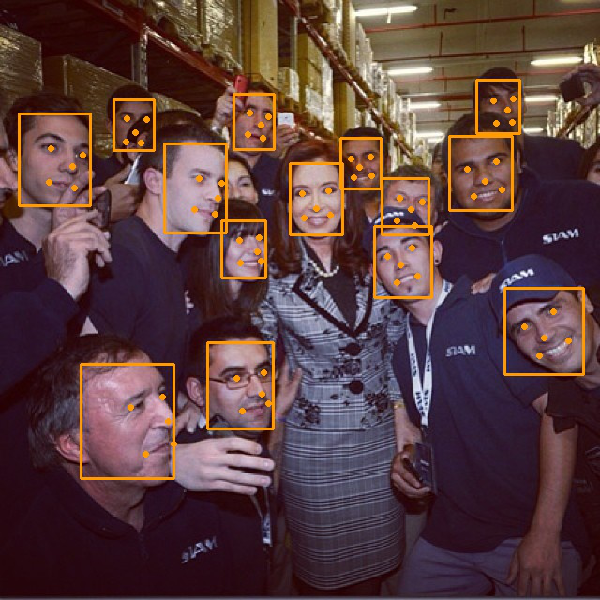

In [0]:

import matplotlib.pyplot as plt
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array, array_to_img

test_image = image.load_img('ejemplo.jpg', target_size = (600, 600))
test_image

